<a href="https://colab.research.google.com/github/BIGINCHI/CMOS-GATES_CIRCUITS/blob/main/Copy_of_YOLOv5_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-274-gda2ee39 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
!unzip -q ../CHAIR_DATASET.zip -d ../

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../video.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=../video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-274-gda2ee39 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/305) /content/video.mp4: 384x640 2 WCs, Done. (0.016s)
video 1/1 (2/305) /content/video.mp4: 384x640 2 WCs, Done. (0.011s)
video 1/1 (3/305) /content/video.mp4: 384x640 2 WCs, Done. (0.011s)
video 1/1 (4/305) /content/video.mp4: 384x640 2 WCs, Done. (0.011s)
video 1/1 (5/305) /content/video.mp4: 384x640 2 WCs, Done. (0.011s)
video 1/1 (

In [ ]:
# Run YOLOv5x on COCO test
!python val.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65 --half --task test

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5x.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-274-gda2ee39 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 166M/166M [00:20<00:00, 8.58MB/s]

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients

Dataset not found ⚠, missing paths ['/content/datasets/coco/val2017.txt']
100% 67.7M/67.7M [00:09<00:00, 7.48MB/s]
Unzipping ../datasets/coco2017labels.zip...
Unzipping ../datasets/coco/images/val2017.zip...
Traceback (most recent call last):
  File "val.py", line 394, in <module>
    main(opt)
  File "val.py", line 367, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_co

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 90 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-274-gda2ee39 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [ ]:
!pip install mediapipe


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.3 MB/s 


In [ ]:
from google.colab import files
import cv2
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import mediapipe as mp
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

/content/CHAIR_DATASET/images/train/23.jpg


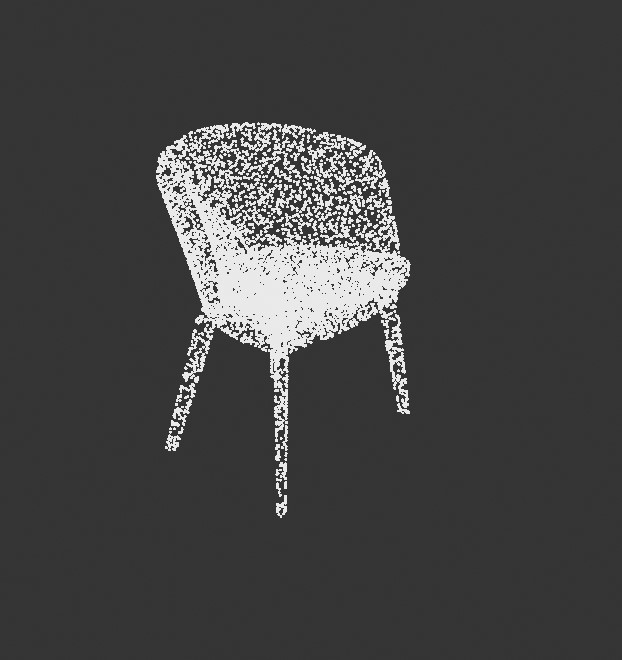

/content/CHAIR_DATASET/images/train/5.jpg


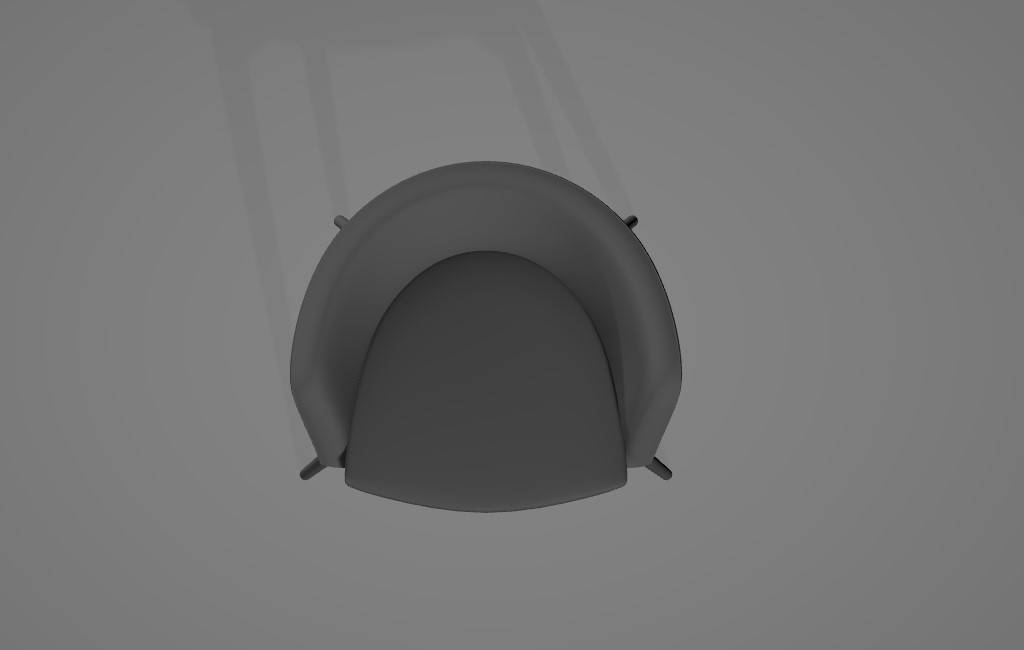

/content/CHAIR_DATASET/images/train/29.jpg


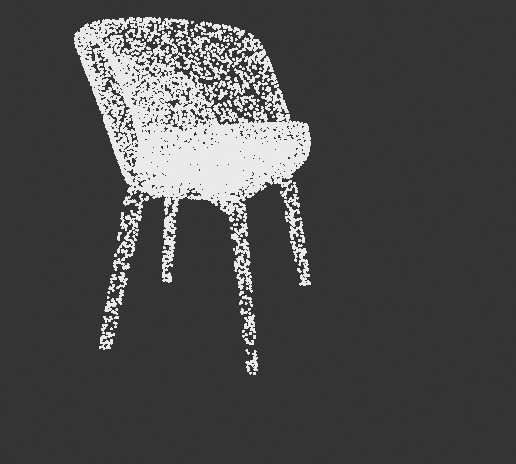

/content/CHAIR_DATASET/images/train/12.jpg


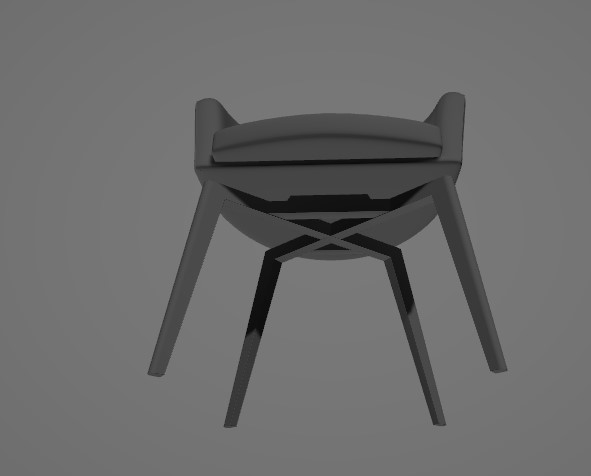

/content/CHAIR_DATASET/images/train/6.jpg


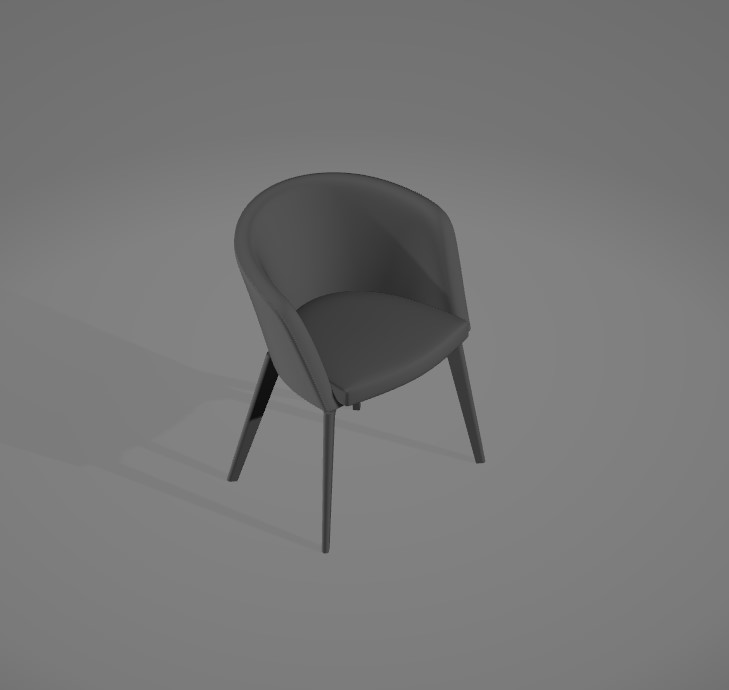

/content/CHAIR_DATASET/images/train/26.jpg


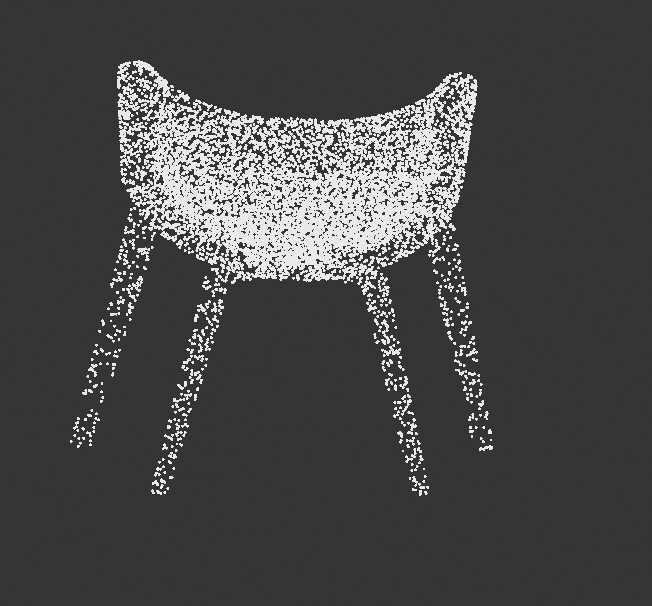

/content/CHAIR_DATASET/images/train/17.jpg


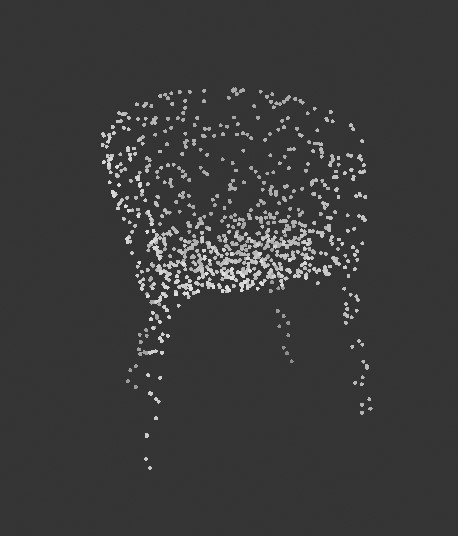

/content/CHAIR_DATASET/images/train/28.jpg


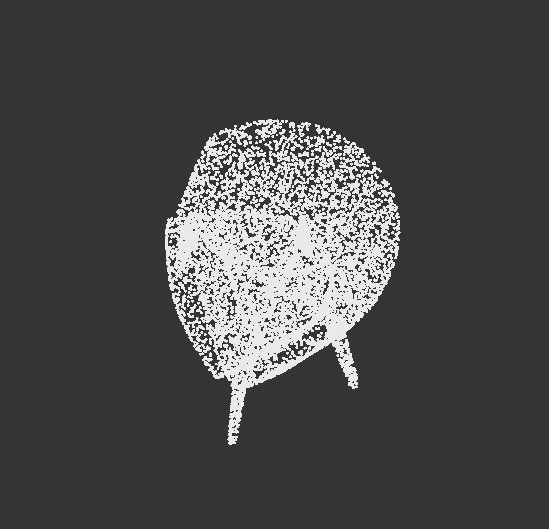

/content/CHAIR_DATASET/images/train/1.jpg


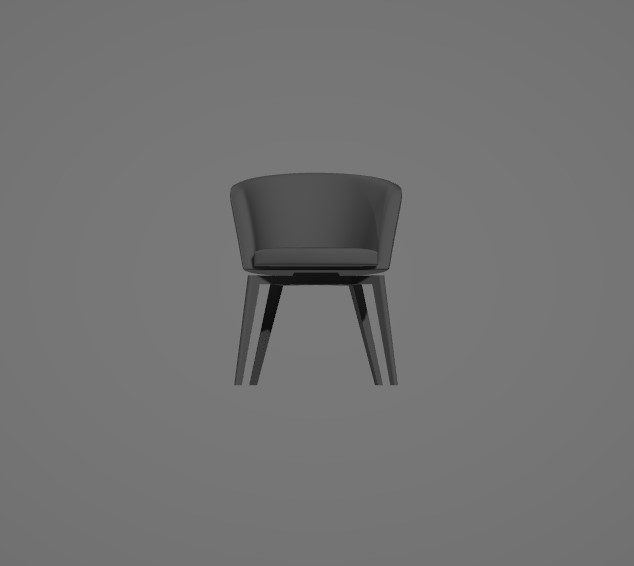

/content/CHAIR_DATASET/images/train/19.jpg


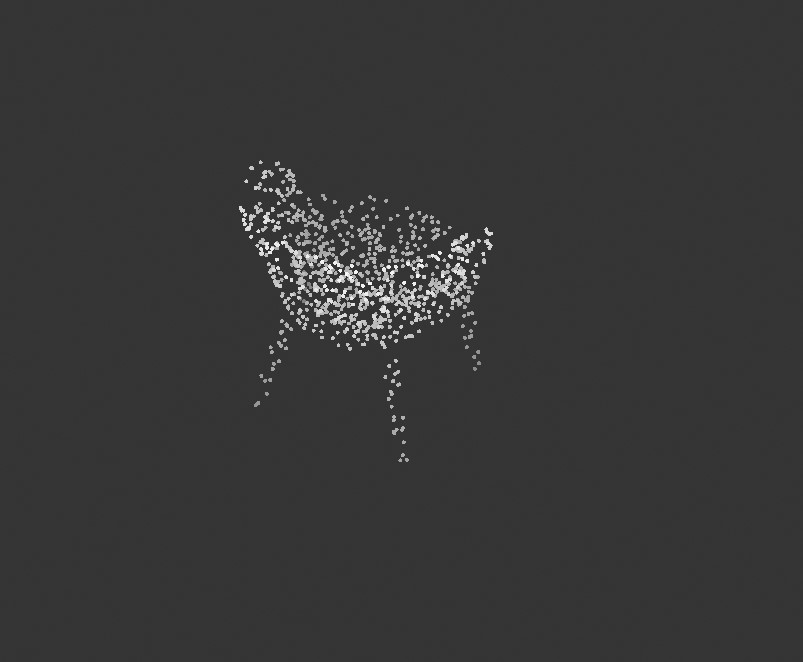

/content/CHAIR_DATASET/images/train/3.jpg


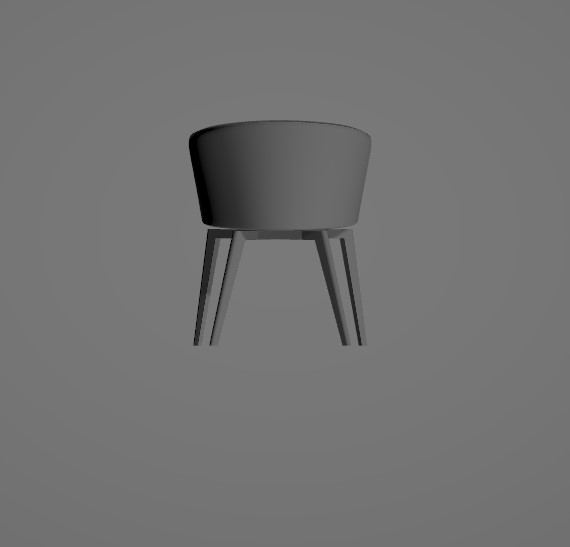

/content/CHAIR_DATASET/images/train/16.jpg


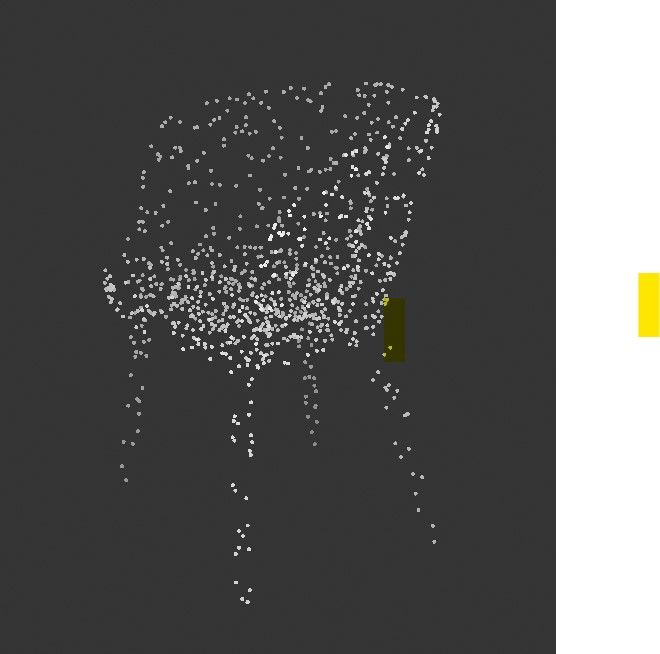

/content/CHAIR_DATASET/images/train/11.jpg


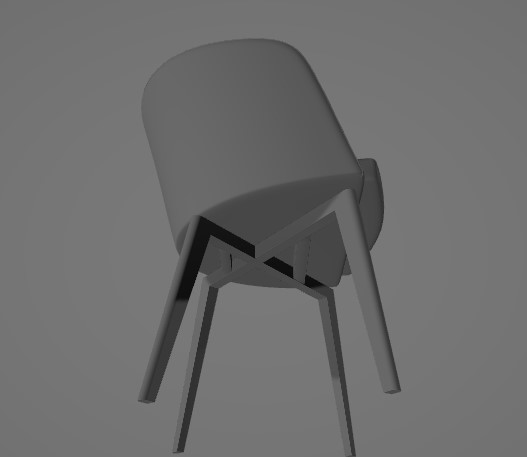

/content/CHAIR_DATASET/images/train/15.jpg


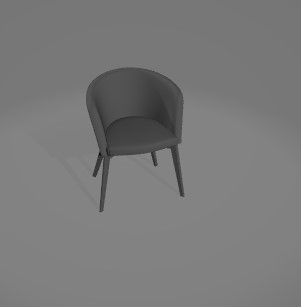

/content/CHAIR_DATASET/images/train/27.jpg


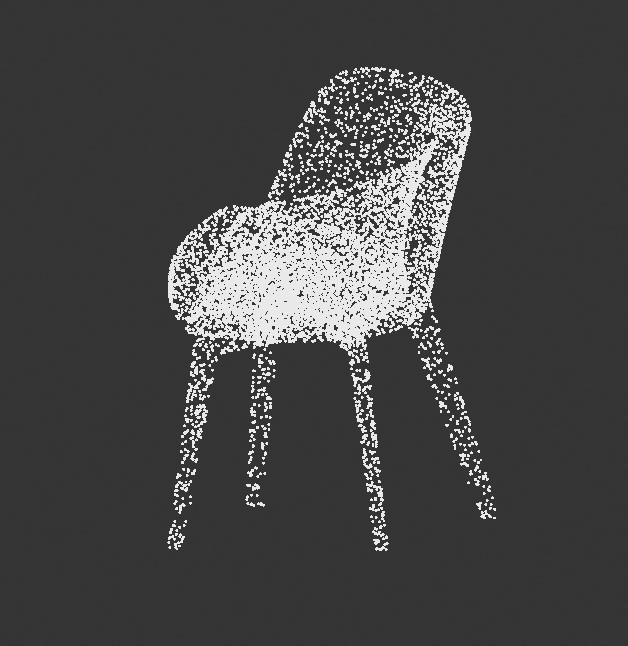

/content/CHAIR_DATASET/images/train/30.jpg


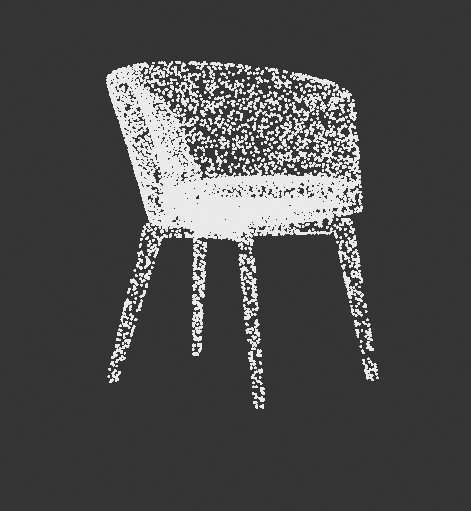

/content/CHAIR_DATASET/images/train/24.jpg


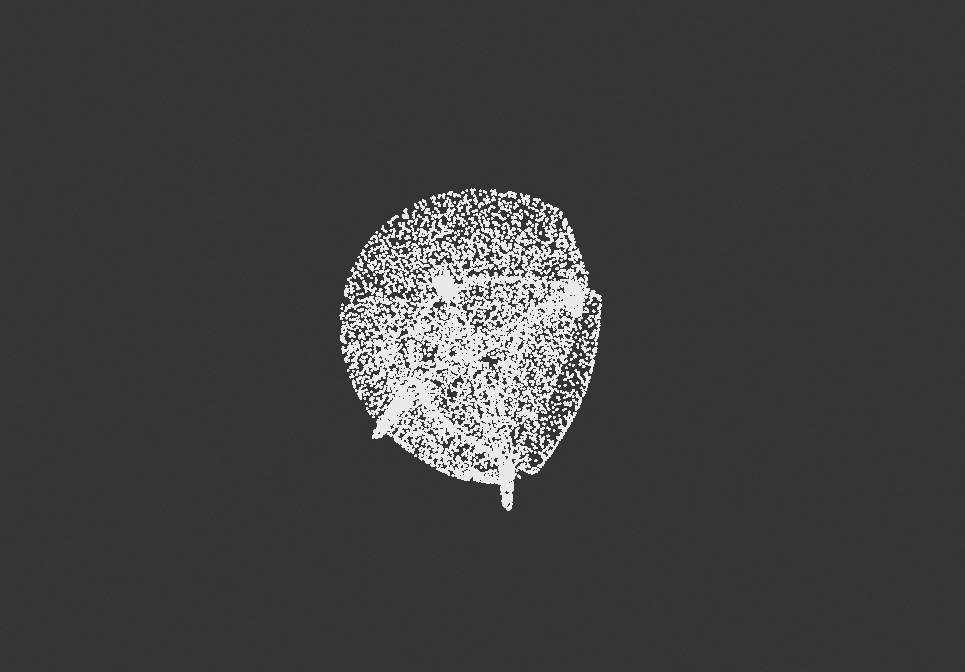

/content/CHAIR_DATASET/images/train/22.jpg


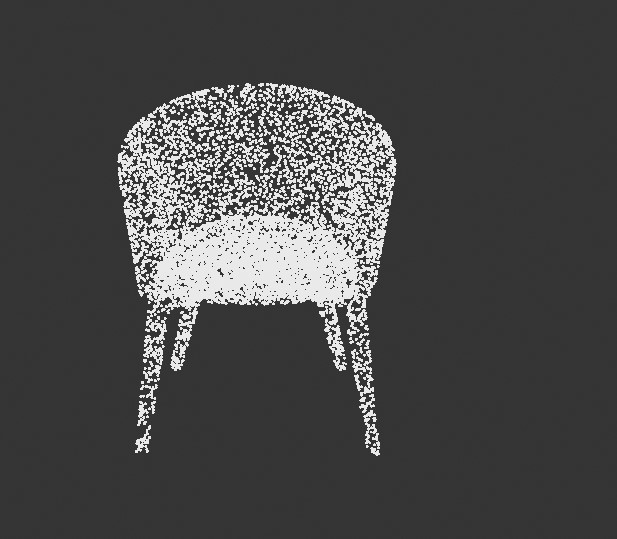

/content/CHAIR_DATASET/images/train/14.jpg


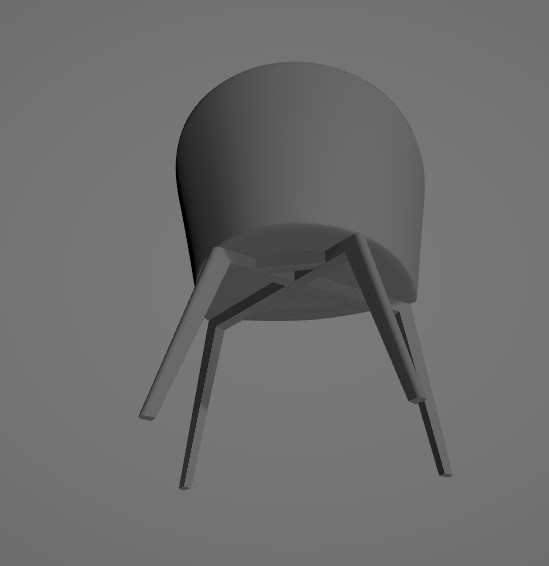

/content/CHAIR_DATASET/images/train/18.jpg


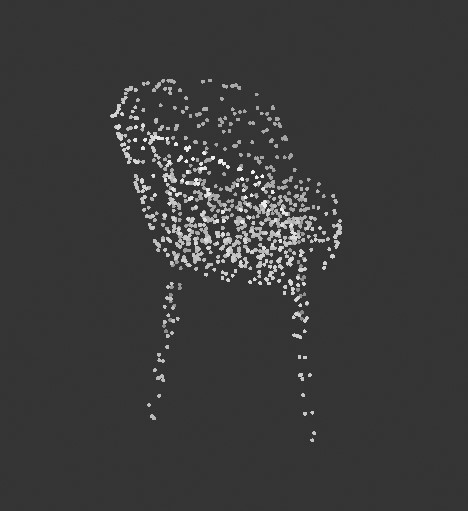

/content/CHAIR_DATASET/images/train/13.jpg


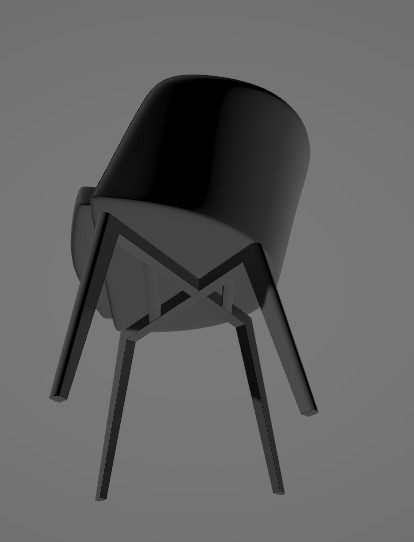

/content/CHAIR_DATASET/images/train/10.jpg


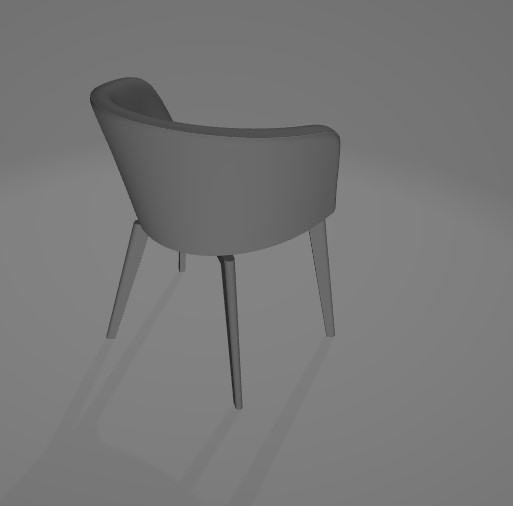

/content/CHAIR_DATASET/images/train/9.jpg


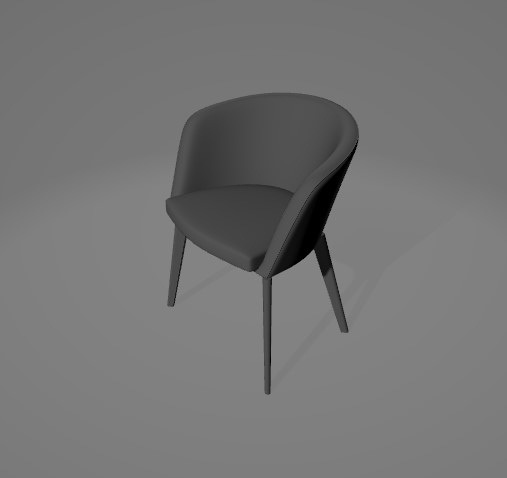

/content/CHAIR_DATASET/images/train/8.jpg


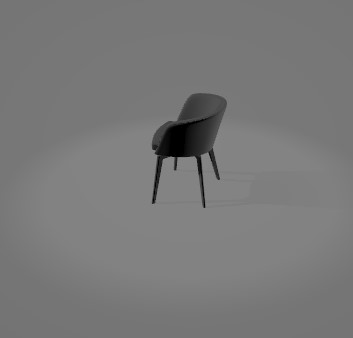

/content/CHAIR_DATASET/images/train/21.jpg


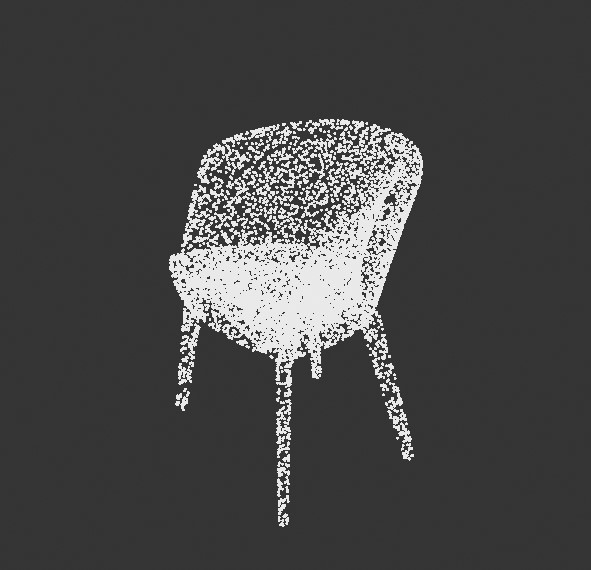

/content/CHAIR_DATASET/images/train/25.jpg


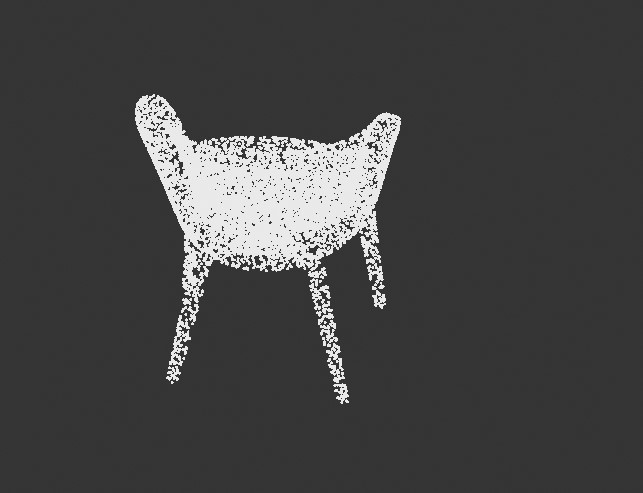

/content/CHAIR_DATASET/images/train/20.jpg


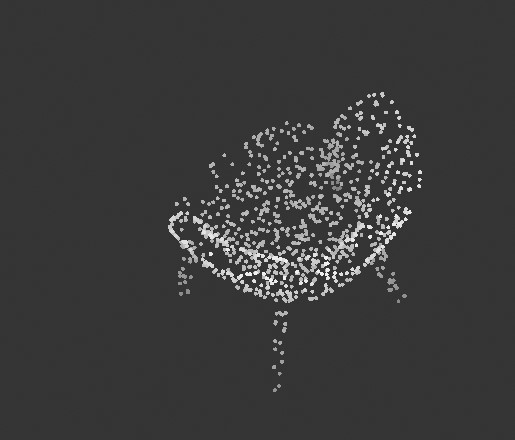

/content/CHAIR_DATASET/images/train/2.jpg


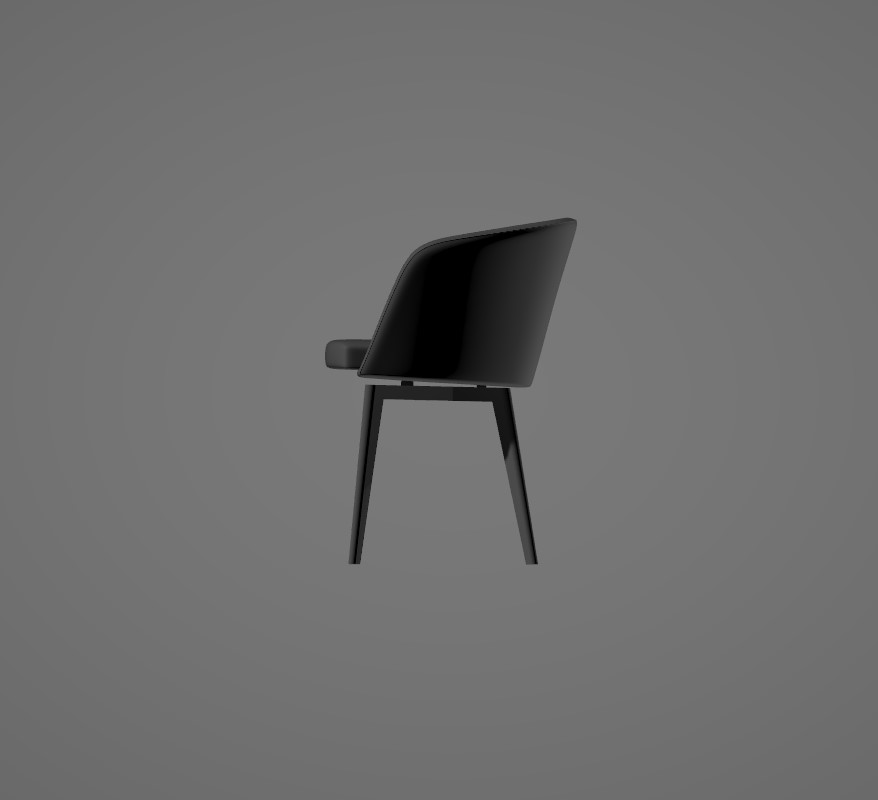

/content/CHAIR_DATASET/images/train/7.jpg


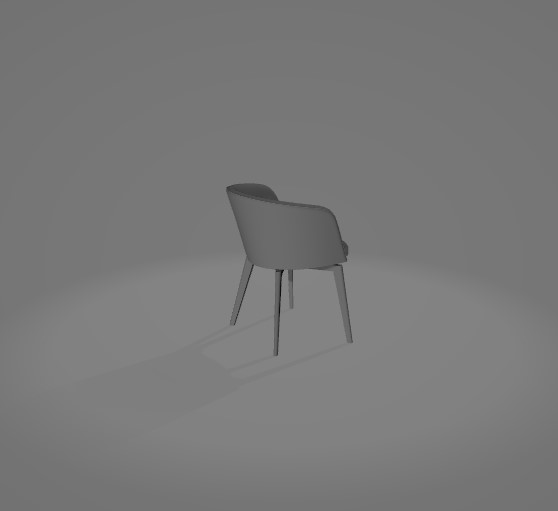

/content/CHAIR_DATASET/images/train/4.jpg


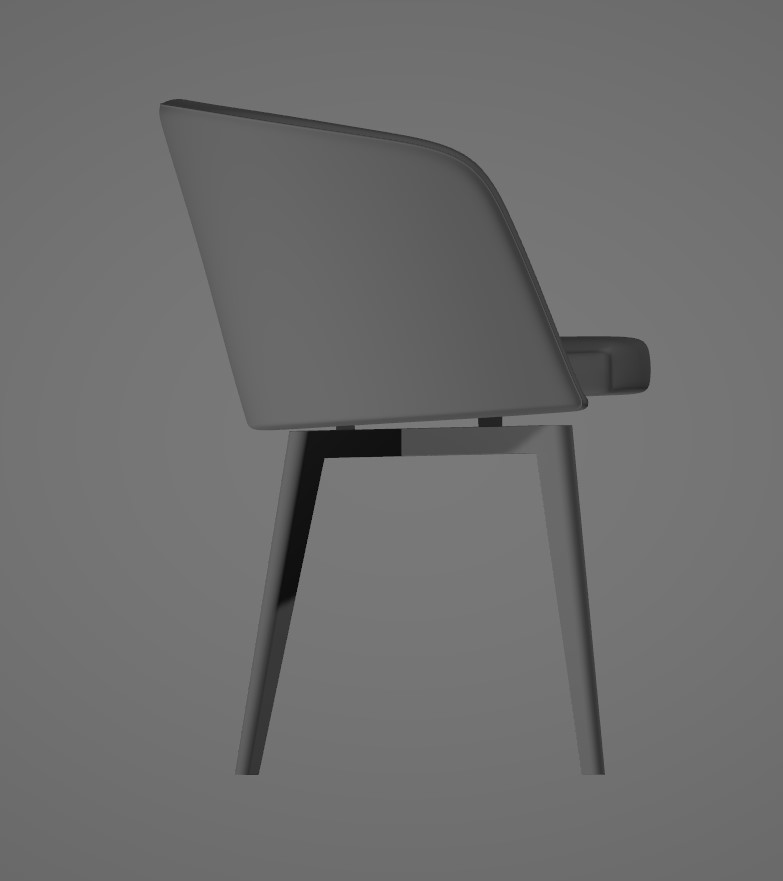

In [ ]:
import glob

# Read images with OpenCV.
chair_images = {name: cv2.imread(name) for name in glob.glob("/content/CHAIR_DATASET/images/train/*.jpg")}

# Preview the images.
for name, image in chair_images.items():
  print(name)   
  cv2_imshow(image)

No box landmarks detected on /content/CHAIR_DATASET/images/train/23.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/5.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/29.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/12.jpg
Box landmarks of /content/CHAIR_DATASET/images/train/6.jpg:


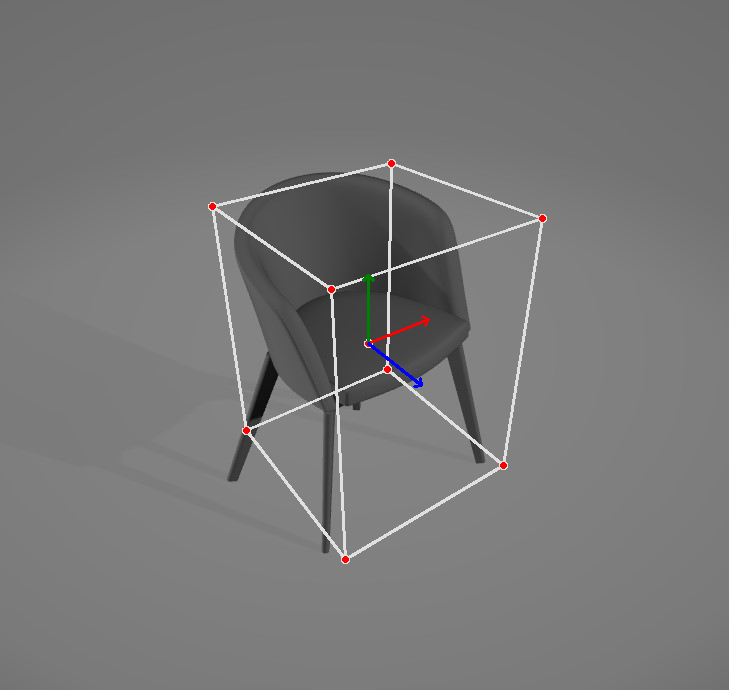

No box landmarks detected on /content/CHAIR_DATASET/images/train/26.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/17.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/28.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/1.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/19.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/3.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/16.jpg
Box landmarks of /content/CHAIR_DATASET/images/train/11.jpg:


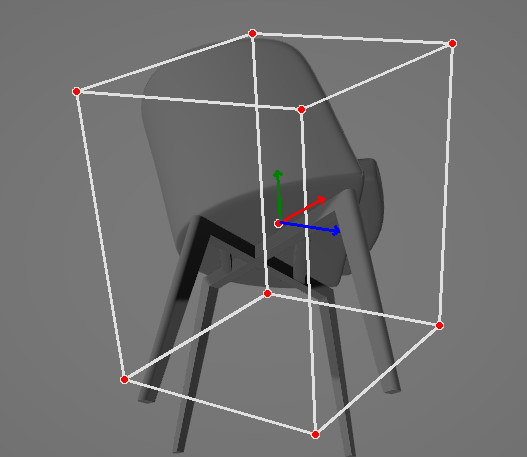

Box landmarks of /content/CHAIR_DATASET/images/train/15.jpg:


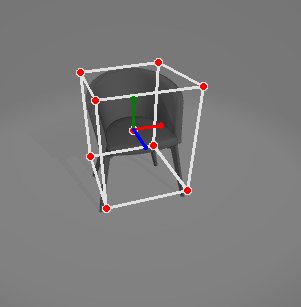

Box landmarks of /content/CHAIR_DATASET/images/train/27.jpg:


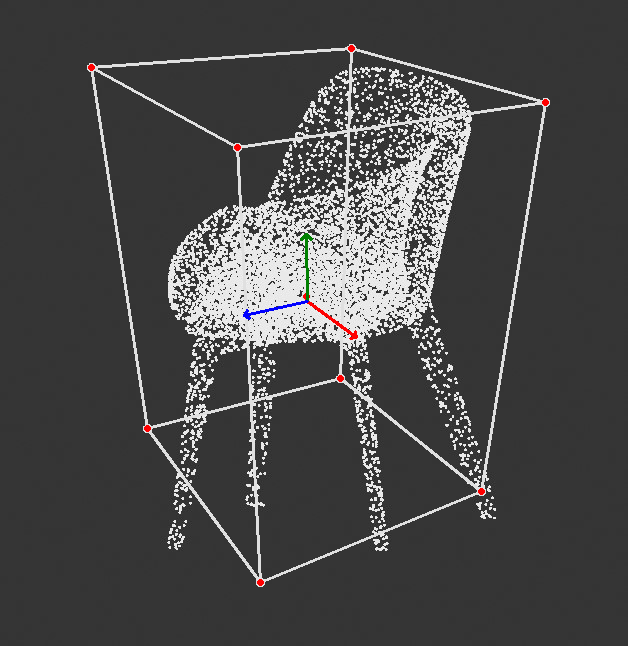

No box landmarks detected on /content/CHAIR_DATASET/images/train/30.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/24.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/22.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/14.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/18.jpg
Box landmarks of /content/CHAIR_DATASET/images/train/13.jpg:


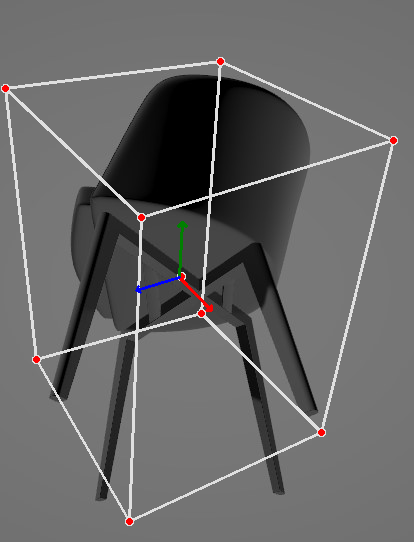

Box landmarks of /content/CHAIR_DATASET/images/train/10.jpg:


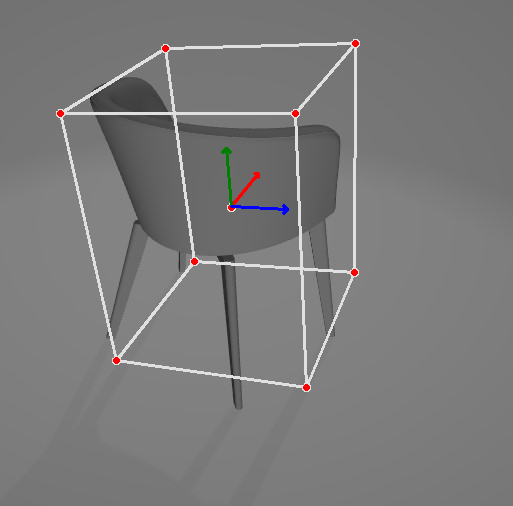

Box landmarks of /content/CHAIR_DATASET/images/train/9.jpg:


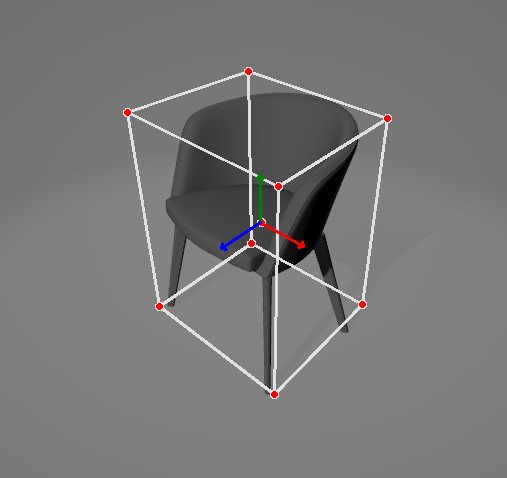

Box landmarks of /content/CHAIR_DATASET/images/train/8.jpg:


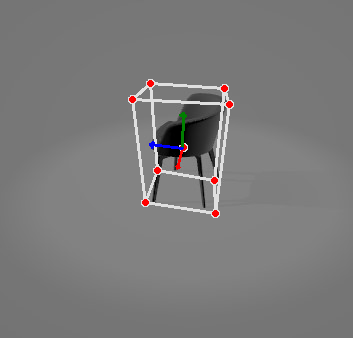

No box landmarks detected on /content/CHAIR_DATASET/images/train/21.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/25.jpg
No box landmarks detected on /content/CHAIR_DATASET/images/train/20.jpg
Box landmarks of /content/CHAIR_DATASET/images/train/2.jpg:


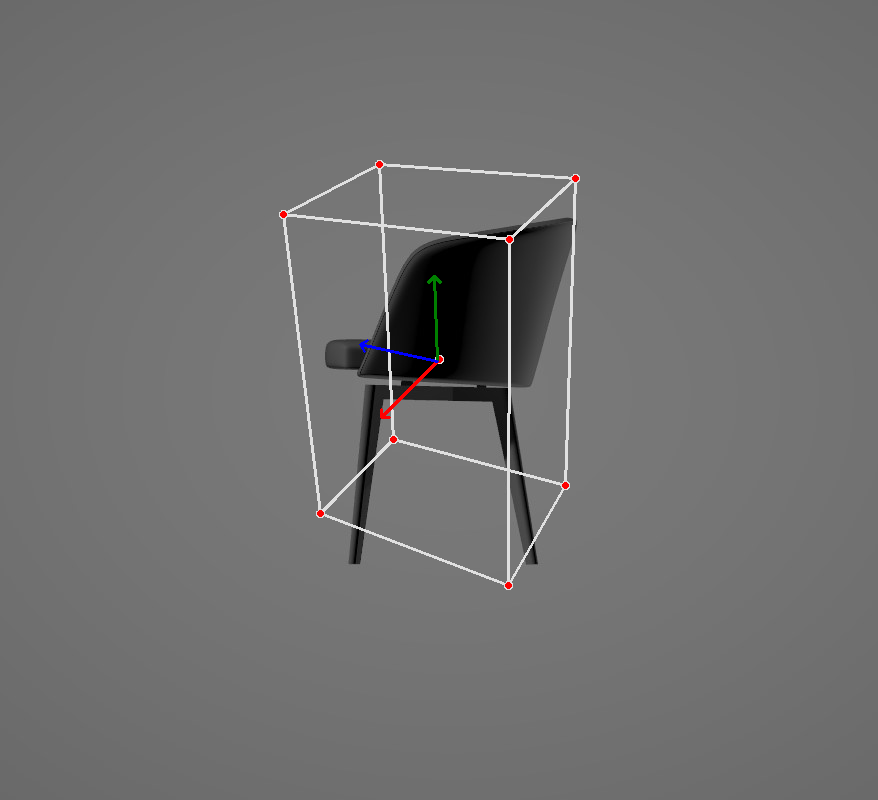

Box landmarks of /content/CHAIR_DATASET/images/train/7.jpg:


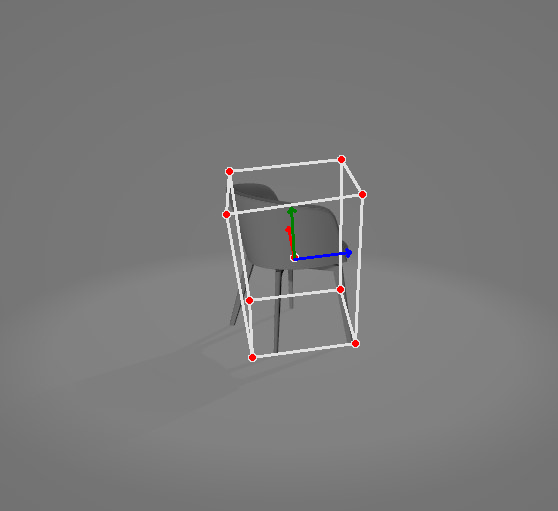

Box landmarks of /content/CHAIR_DATASET/images/train/4.jpg:


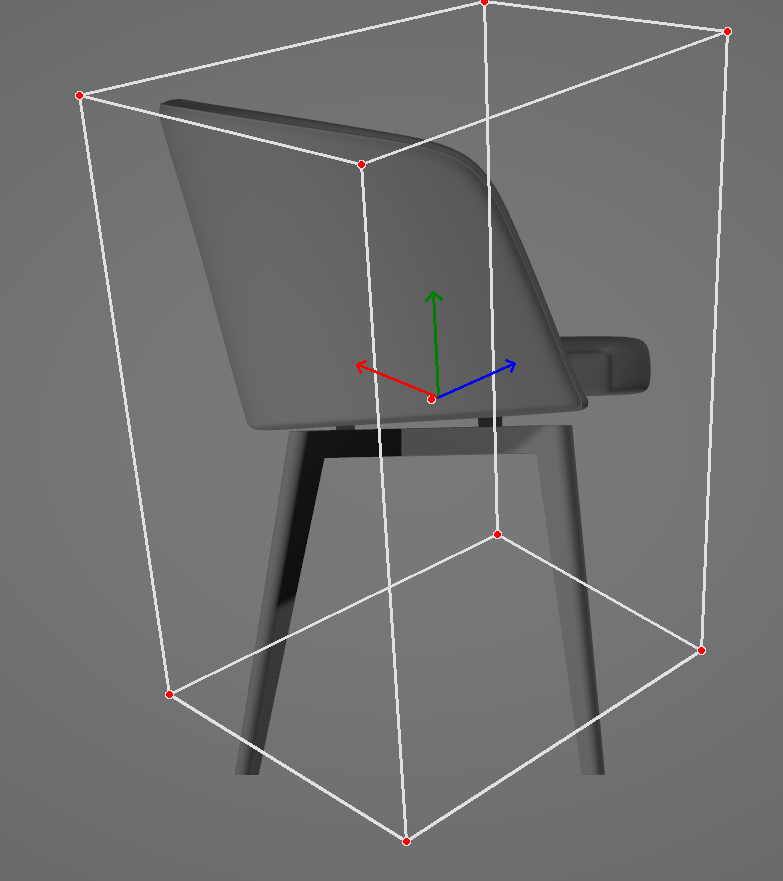

In [ ]:
with mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=5,
    min_detection_confidence=0.5,
    model_name='Chair') as objectron:
  # Run inference on shoe images.
  for name, image in chair_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {name}')
      continue
    print(f'Box landmarks of {name}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
    cv2_imshow(annotated_image)

In [ ]:
%cd /content/TF

/content/TF


In [ ]:
!pwd


/content/TF


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 74921, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 74921 (delta 237), reused 288 (delta 154), pack-reused 74512
Receiving objects: 100% (74921/74921), 580.51 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (53107/53107), done.


In [ ]:
%cd /content/TF/models/research/object_detection

/content/TF/models/research/object_detection


In [ ]:
!pwd

/content/TF/models/research/object_detection


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'CHAIR_DATASET'
IMAGE_NAME = '/content/CHAIR_DATASET/images/train/1.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap('/content/CHAIR_DATASET/labels/')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
cv2.imshow('Object detector', image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()

ImportError: ignored